# 支持向量机
- 十分强大的一个监督学习方法，用于分类问题，功效源于其突出的理论。

- 可单分类可多分类，可处理线性可分数据也可处理非线性可分问题。

- 不同问题可通过使用不同的**核函数**进行处理

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
# use seaborn for graphs
import seaborn as sns; sns.set()

进行简单的二类问题分类示例

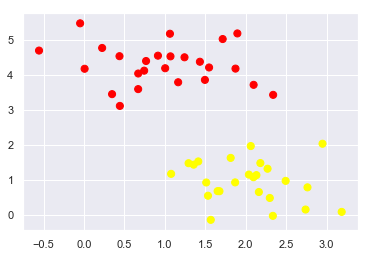

In [5]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

(-1, 3.5)

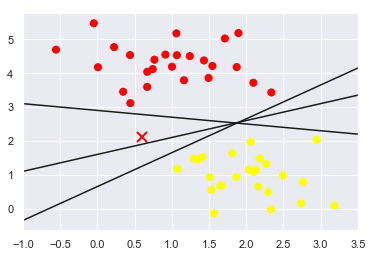

In [10]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

# 只是在图中插入一个字符x，用于标记区域内某个点
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

## 最大化样本边界（直线或者超平面到各样本间的最近距离）
即支持向量机的核心思路，其中距离最近的点称为支持向量

In [11]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [19]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    # GCA stands for Get Current Axes. Same as with plt.gcf() , you can use plt.gca() to get a reference to the current axes
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # 创建评估的网络
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    
    P = model.decision_function(xy).reshape(X.shape)
    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                  model.support_vectors_[:, 1],
                  s=400, linewidth=1, facecolors='none')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

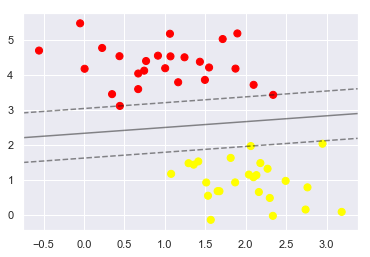

In [20]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

In [18]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

In [23]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=N, centers=2, random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

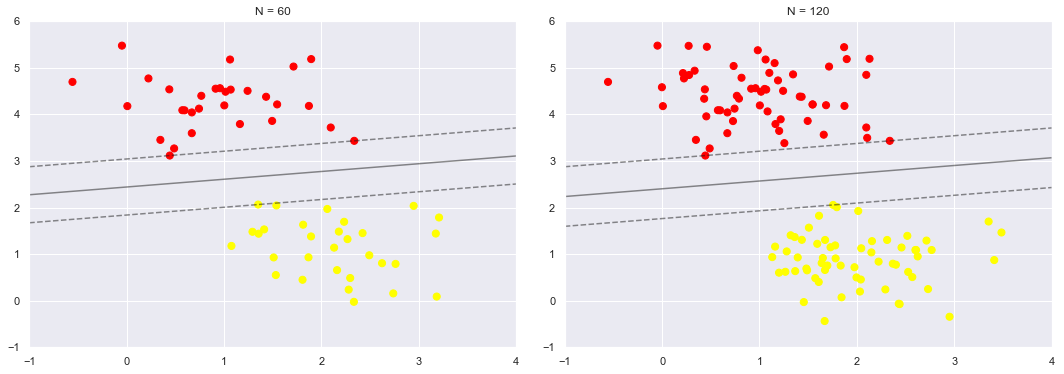

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [26]:
from ipywidgets import interact, fixed
interact(plot_svm, N=np.arange(10, 200, 10), ax=fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 13…

<function __main__.plot_svm(N=10, ax=None)>

## 非线性模型
核函数SVM模型

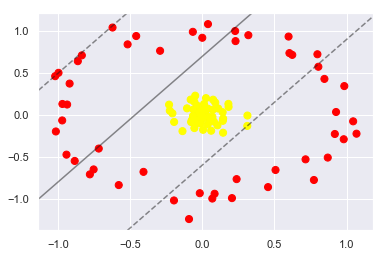

In [27]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False)

继续使用linear kernel发现不适用，无法处理非线性问题

类似于基函数回归，可构建以数据圆圈为中心的径向基函数

In [28]:
# 径向基函数
r = np.exp(-(X ** 2).sum(1))

In [29]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 90], azip=(-180, 180), 
        X=fixed(X), y=fixed(y))

interactive(children=(Dropdown(description='elev', options=(-90, 90), value=-90), IntSlider(value=30, descript…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 1.05874660e-01, -1.25049022e-01],
       [-7.66545226e-02, -8.53558218e-02],
       [-1.65212498e-02, -9.35583912e-01],
       [ 7.38859997e-02,  6.12085919e-02],
       [ 7.67361458e-04,  9.20168307e-01],
       [ 1.82872227e-01,  9.50267070e-02],
       [ 5.98411881e-01,  9.34696133e-01],
       [-2.29290064e-01,  1.21731256e-01],
       [ 5.11007281e-02, -5.02781875e-02],
       [ 8.09767251e-02, -7.97971283e-02],
       [-1.72389997e-03,  5.83387427e-02],
       [-4.56914549e-01,  9.41031606e-01],
       [ 7.10429500e-02, -2.31532862e-02],
       [-5.77815304e-01, -8.38587980e-01],
       [ 1.81705574e-01,  1.30738172e-01],
       [-8.82817316e-01, -5.50399012e-01],
       [-5.16395267e-01,  8.41547029e-01],
       [ 9.84405091e-01,  3.43436771e-01],
       [ 8.04761695e-01,  5.74054685e-01],
       [ 4.02274416e-02,  1.08342650e+00],
       [ 8.37655097e-04,  2.47874148e-02],
       [-7.51770606e-01, -6.51668259e-01],
       

In [31]:
clf = SVC(kernel='rbf', C=1E6, gamma='auto')
clf.fit(X, y)

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

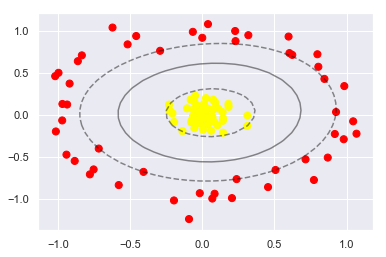

In [32]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=300, lw=1, facecolors='none')

上述情况的支持向量机分类问题中，数据有一个明显的特征，就是两类数据正好位某个面的两侧，没有交叉

对于有交叉的数据，可通过设置支持向量机中C值进行边界线的**软化**（即可忽略其中部分的点，支持向量的选取没那么严格）

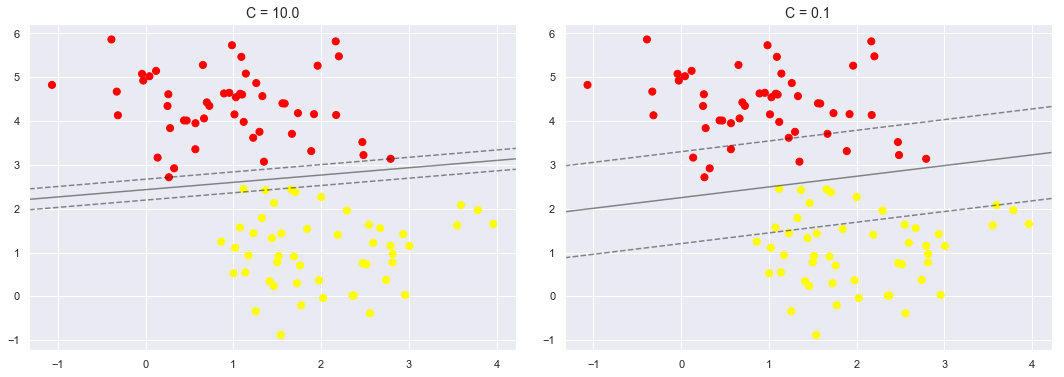

In [34]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
               model.support_vectors_[:, 1],
               s=300, lw=1, facecolors='none')
    
    axi.set_title('C = {:.1f}'.format(C), size=14)

# SVC（SVM分类）

## on Iris

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

C:\Users\84040\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
iris = datasets.load_iris()

In [5]:
X = iris['data'][:, (2 ,3)]
y = (iris['target'] == 2).astype(np.float64)

In [8]:
svm_clf = Pipeline((
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss='hinge')),
))

其它选择

```python
SVC(kernel='linear', C=1)
SGDClassifier(loss='hinge', alpha=1/(m*C))
```

In [11]:
svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [12]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [16]:
import matplotlib.pyplot as plt

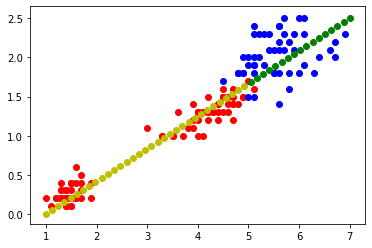

In [80]:
index1 = (y == 0)
index2 = (y == 1)
plt.scatter(X[index1, 0], X[index1, 1], color='r')
plt.scatter(X[index2, 0], X[index2, 1], color='b')
x_samples, y_samples = np.linspace(1,7,50), np.linspace(0, 2.5, 50)
samples_index1, samples_index2 = svm_clf.predict(np.c_[x_samples, y_samples])==0, svm_clf.predict(np.c_[x_samples, y_samples])==1
plt.plot(x_samples[samples_index1], y_samples[samples_index1], 'yo')
plt.plot(x_samples[samples_index2], y_samples[samples_index2], 'go')
# x_samples_index1, x_samples_index2 = svm_clf.predict()==0, svm_clf.predict(y_samples)==1

In [69]:
svm_clf.predict([X[0]]).shape

(1,)

## 线性核

In [13]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [14]:
polynomial_svm_clf = Pipeline((
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss='hinge'))
))

In [15]:
polynomial_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

## 多项式核

In [81]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline((
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=3, coef0=1, C=5))
    # 3阶多项式核
))

In [82]:
poly_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=1, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

## 高斯RBF核（高斯径向基函数核）

In [83]:
rbf_kernel_clf = Pipeline((('scaler', StandardScaler()),
                          ('svm_clf', SVC(kernel='rbf', gamma=5, C=0.001))))
rbf_kernel_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=0.001, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=5,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

# SVR（SVM回归）

## 线性核

通过控制超参数$\epsilon$，$\epsilon$控制间隔幅度，$\epsilon$越大，支持向量间的幅度越大

In [84]:
from sklearn.svm import LinearSVR

In [85]:
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

## 非线性核

机制同SVC

In [86]:
from sklearn.svm import SVR

In [87]:
svm_poly_reg = SVR(kernel='poly', degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X, y)

SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


# 案例：人脸识别

In [35]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


从结果可以看出每张图片尺寸为62×47，像素过多，一张图像素有3000个，应该先做一个预处理

预处理方式：**主成分分析**，提取150个基本像素，然后再通过支持向量机来处理

In [37]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [38]:
pca = PCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [39]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

In [44]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]
}
grid = GridSearchCV(model, param_grid)
%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Wall time: 28.9 s
{'svc__C': 10, 'svc__gamma': 0.001}


In [45]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

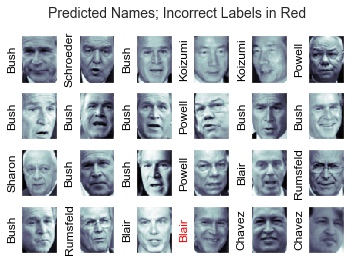

In [46]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1], color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

In [47]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

        micro avg       0.85      0.85      0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



Text(89.18, 0.5, 'predicted label')

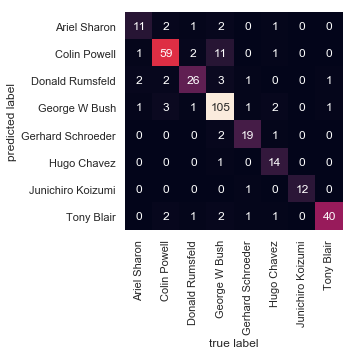

In [48]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=faces.target_names, yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

优点：

- 依赖的支持变量较少

- 完成训练后，预测速度很快

- 对于高维数据的学习效果非常好

- 配合好核函数方法具有很好的通用性，能适用不同类型数据

缺点：

- 训练时间复杂度较高，对于样本$N$,最差与高效优化后的时间复杂度为$O[N^3]$，$O[N^2]$。大样本学习的计算成本非常高

- 训练效果极其依赖于边界软化参数$C$的选择，需要进行交叉检验和Gridsearch，计算量较大

- 难以对结果进行概率解释